Introduction to Artificial Intelligence - TP2
--

At the end of this session, you will be able to : 
- Perform basic unsupervised learning tasks using sklearn and PyTorch
- Apply unsupervised learning on PyRat datasets 

In [2]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, MiniBatchDictionaryLearning, DictionaryLearning

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
np.random.seed(0)


# Digits dataset

For this TP we are going to be using the DIGITS dataset. The first thing we are going to do is load the dataset. 

As this is <b>unsupervised</b> we will mostly ignore y (it will only be used for visualization).

Load the model

In [3]:
x_digits, y_digits = load_digits(n_class=10, return_X_y=True)

Visualize some examples

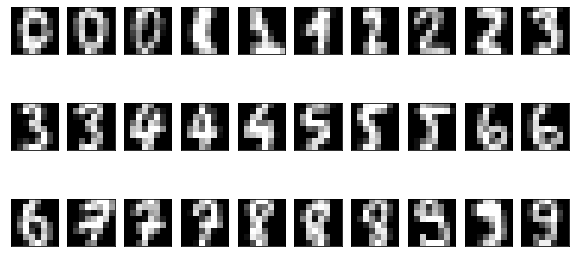

In [4]:
fig = plt.figure(figsize=(10,5))

for i in range(10):
    plt.subplot(3, 10, 3*i+1)
    
    # pick a random digit in the current category     
    curX = x_digits[y_digits==i]    
    r = np.random.randint(curX.shape[0])
    curim = curX[r, :].reshape((8,8))
    
    plt.imshow(curim, cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    
    
    plt.subplot(3, 10, 3*i+2)
    # pick a random digit in the current category     
    curX = x_digits[y_digits==i]    
    r = np.random.randint(curX.shape[0])
    curim = curX[r, :].reshape((8,8))
    
    plt.imshow(curim, cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(3,10,3*i+3)
    # pick a random digit in the current category     
    curX = x_digits[y_digits==i]    
    r = np.random.randint(curX.shape[0])
    curim = curX[r, :].reshape((8,8))
    
    plt.imshow(curim,cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])    

# Unsupervised Feature Selection

In this part, we will see how to use the [VarianceThreshold](https://scikit-learn.org/stable/modules/feature_selection.html#removing-features-with-low-variance) to remove features with low variance. 

The principle is to compute variance for each feature, and remove the features that have a variance smaller than a threshold. By default, the method removes only features with a variance of zero (their values are always identical).


A word of caution though : the variances are not calculated in the same way whether the set threshold is 0 (the default) or a higher value, as just looking for variances of 0 is done with a method with better numerical precision (see the code [here](https://github.com/scikit-learn/scikit-learn/blob/8c9c1f27b/sklearn/feature_selection/_variance_threshold.py#L115) for a more in depth explanation). 


In the following, we will use a very small threshold because we will vary the threshold. 

In [5]:
from sklearn.feature_selection import VarianceThreshold

print('original features shape:')
print(x_digits.shape)

thr = 0.1

selector = VarianceThreshold(threshold=thr)
x_digits_new=selector.fit_transform(x_digits)

print('selected features shape')
print(x_digits_new.shape)

print(f"{x_digits.shape[1]-x_digits_new.shape[1]} features were removed")
variances = selector.variances_

original features shape:
(1797, 64)
selected features shape
(1797, 53)
11 features were removed


We check the array that stores all the variances of the original dataset.

In [26]:
variances

array([0.00000000e+00, 8.22539514e-01, 2.25957923e+01, 1.80426111e+01,
       1.83714668e+01, 3.20904221e+01, 1.10546255e+01, 1.07556433e+00,
       8.87276110e-03, 1.02097566e+01, 2.93758249e+01, 1.58120413e+01,
       2.28613044e+01, 3.66179365e+01, 1.28545405e+01, 6.85061884e-01,
       3.88763936e-03, 1.27828134e+01, 3.23668069e+01, 3.36521458e+01,
       3.81183987e+01, 3.83854244e+01, 1.06208369e+01, 1.92260705e-01,
       1.11172736e-03, 9.89515699e+00, 3.83199960e+01, 3.45896825e+01,
       3.78271843e+01, 3.44677176e+01, 1.35823949e+01, 2.22097734e-03,
       0.00000000e+00, 1.21062508e+01, 3.99794098e+01, 3.92708623e+01,
       3.51867141e+01, 3.44453245e+01, 1.25054061e+01, 0.00000000e+00,
       2.10670787e-02, 8.88628020e+00, 4.27210645e+01, 4.14682555e+01,
       3.91596797e+01, 3.24209712e+01, 1.87467005e+01, 9.44150719e-02,
       4.16838922e-02, 3.04735308e+00, 3.18426060e+01, 2.73057786e+01,
       2.80960743e+01, 3.63545816e+01, 2.41870885e+01, 9.68505910e-01,
      

Let's visualize which features have been removed ! Generate a boolean mask named `mask` that equals True if a feature must be kept, and False othewise. This can be done by thresholding the variances vector.

In [13]:
### TO BE COMPLETED

# Definition of the mask

mask = variances > thr
mask

array([False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True])

The following figure is organized as follows : 
- the first row shows original examples of the digits dataset
- the second row shows the mask that select features (selected features are in white)
- the third row shows the result of masking the original sample from first row with the mask

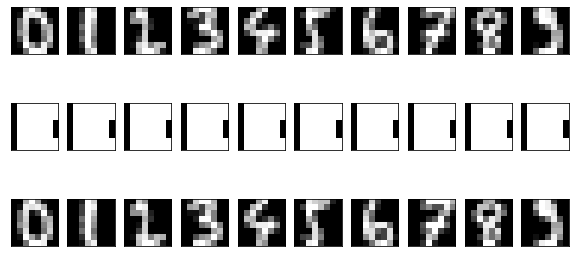

In [14]:
# plots original digits, mask and masked digits 

fig = plt.figure(figsize=(10,5))

for i in range(10):
    
    plt.subplot(3, 10, i+1)
    # pick a random digit in the current category     
    curX = x_digits[y_digits==i]    
    r = np.random.randint(curX.shape[0])
    curim = curX[r, :].reshape((8,8))
    
    plt.imshow(curim, cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    
    #plot mask
    plt.subplot(3, 10, i+11)
    plt.imshow(mask.reshape((8,8)), cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(3,10,i+21)
    # plot masked image 
    curim_masked =  curim*mask.reshape((8,8))
    
    plt.imshow(curim_masked,cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])    

By changing the threshold, you can see more or less features being selected (equivalently, features being removed). 

In order to know how to select the threshold, you should examine the distribution of feature variances. First, let's visualize it using a histogram. 

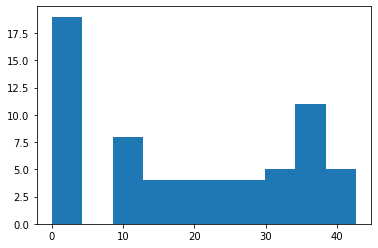

In [23]:
### TO BE COMPLETED : histogram

# Plot simple histogram with matplotlib

plt.hist(variances, bins=10)
plt.show()

You may take a decision to choose the threshold directly using this plot, but it will not tell you directly how many features are removed. 

We can use the numpy [percentile](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html) (use the equivalent nanpercentile if you may have NaN in your features) in order to find the threshold that removes a certain percentage of features

In [27]:
### TO BE COMPLETED :
## use the numpy percentile function to find the threshold to remove a given percentages of features to keep

perc_toremove = 75

thresh_perc =  np.percentile(variances, perc_toremove) ### TO BE COMPLETED

print(f"A threshold of {thresh_perc} will remove {perc_toremove}% features according to their variance ")

A threshold of 33.85044046390296 will remove 75% features according to their variance 


Up to how many % features removed can you still recognize the digits ?  (Qualitative, there is no "good answer") 

We set the new threshold and call the VarianceThreshold again for the original dataset.
We confirm that we only have 25% of the features of the original dataset.

In [28]:
print('original features shape:')
print(x_digits.shape)

# Set the obtained treshold by percentile method

thr = 33.85044046390296

selector = VarianceThreshold(threshold=thr)
x_digits_new=selector.fit_transform(x_digits)

print('selected features shape')
print(x_digits_new.shape)

print(f"{x_digits.shape[1]-x_digits_new.shape[1]} features were removed")

original features shape:
(1797, 64)
selected features shape
(1797, 16)
48 features were removed


Update the mask with the new treshold

In [30]:
# Definition of the mask

mask = variances > thr
mask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True, False, False, False, False,  True,  True,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False])

The following figure is organized as follows : 
- the first row shows original examples of the digits dataset
- the second row shows the mask that select features (selected features are in white)
- the third row shows the result of masking the original sample from first row with the mask

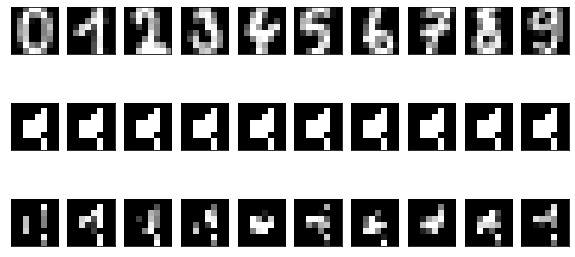

In [31]:
### To be completed

# plots original digits, mask and masked digits 

fig = plt.figure(figsize=(10,5))

for i in range(10):
    
    plt.subplot(3, 10, i+1)
    # pick a random digit in the current category     
    curX = x_digits[y_digits==i]    
    r = np.random.randint(curX.shape[0])
    curim = curX[r, :].reshape((8,8))
    
    plt.imshow(curim, cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    
    #plot mask
    plt.subplot(3, 10, i+11)
    plt.imshow(mask.reshape((8,8)), cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(3,10,i+21)
    # plot masked image 
    curim_masked =  curim*mask.reshape((8,8))
    
    plt.imshow(curim_masked,cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])   


This part was just to demonstrate a very simple way to remove features in an unsupervised way (you don't need labels). 

You can also check out [other feature selection methods](https://scikit-learn.org/stable/modules/feature_selection.html) for which you will need the labels. Feel free to experiment. 

K-means Clustering 
--

In this part, we demonstrate the use of k-means clustering. 

First, please have a look at the course with notes and read it once again. 

Done ? We will use the [KMeans estimator from sklearn](https://scikit-learn.org/stable/modules/clustering.html#k-means). Importantly, here are the key concepts :
- We define a kmeans estimator like this : `kmeans = KMeans(n_clusters)`. The number of clusters has to be decided in advance, using the n_clusters parameter
- The Kmeans clustering is estimated by using the method `fit` on input samples

In [32]:
kmeans=KMeans(n_clusters=10, init='k-means++',random_state=0)

Estimate this clustering on the digits dataset

In [33]:
### to be completed 
kmeans.fit(x_digits)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

Now we are going to visualize the centroids of the $10$ clusters. First we have to get the center of each cluster. 

After having used the method `fit`, the coordinates of the found centroids will be stored in an attribute named `cluster_centers_`, that you can access by doing `kmeans.cluster_centers_`

In [52]:
### CELL TO COMPLETE, put the cluster centers in variable centroids
centroids = kmeans.cluster_centers_
centroids.shape

(10, 64)

We will now plot the clusters centroids. Centroids are points in the same space than the original samples, so we can plot them similarly than the samples of the dataset.

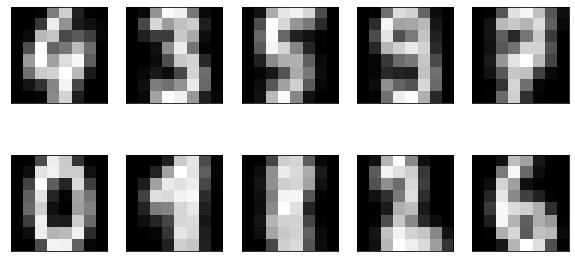

In [35]:
fig = plt.figure(figsize=(10,5))

for i,curcen in enumerate(centroids):
    
    plt.subplot(2, 5, i+1)
    im_cen = curcen.reshape((8,8))
    plt.imshow(im_cen, cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])

We are now going to take a look in our reconstructions using our KMeans model.

First we take a sample from each class.

In [36]:
### Pick a few random examples

whichex = np.random.randint(low=0,high=100,size=1) 
X_samp = np.concatenate([x_digits[y_digits==i][whichex] for i in range(10)])
X_samp.shape

(10, 64)


- The `transform` method can be used to estimate distances of samples to the centroids
- The `predict` method, can be used to assign labels of the closest centroid to each sample

Don't hesitate to lookup the help page of these methods using the '?' magic

Use the transform method from the kmeans object on X_samp.
You will obtain an array containing the distances to the centroids. 

In [56]:
### TO BE COMPLETED (10,10) array containing the distances of each sample to each centroid

distances = kmeans.transform(X_samp)
print(distances.shape)
distances

(10, 10)


array([[40.75913586, 41.44335319, 41.83000628, 33.39265548, 45.35361996,
        15.74545501, 44.53710757, 44.63233894, 48.3231956 , 36.95859833],
       [39.06767282, 44.83562581, 47.40873708, 48.18760671, 37.54349412,
        53.05870914, 42.26764662, 21.22458902, 38.02194597, 44.2451161 ],
       [54.26235843, 32.59087541, 39.92506945, 35.98840702, 41.31232413,
        43.70601152, 51.71157785, 31.93144387, 25.06870168, 44.85438677],
       [53.53430315, 15.41565545, 39.79862603, 27.96364497, 38.33563286,
        46.15570952, 41.62102241, 39.9742234 , 38.65650681, 50.28887509],
       [16.26678706, 52.3187927 , 39.62751607, 47.31677757, 39.14200397,
        42.19809391, 42.41905436, 39.13645041, 49.18361898, 35.34342613],
       [45.29854036, 34.60926933, 32.42789259, 26.72342493, 44.93306099,
        40.28034192, 42.05259347, 45.3208912 , 45.69207282, 45.16798404],
       [37.4498048 , 46.86144157, 43.07280121, 41.37948091, 46.04060438,
        40.86984138, 50.20976615, 41.09963026

Use the argmin method from numpy to generate an array containing the index corresponding to the closest centroid to the samples

In [51]:
# TO BE COMPLETED (10,) array containing the index closest centroid to the samples

idx_closest_centroids = np.argmin(distances, axis=1)
print(idx_closest_centroids.shape)
idx_closest_centroids

(10,)


array([5, 7, 8, 1, 0, 3, 9, 4, 3, 6], dtype=int64)

Fetch the corresponding centroid in another array closest_centroids.

In [54]:
# TO BE COMPLETED (10,64) array containing the closest centroid to each sample 
closest_centroids = centroids[idx_closest_centroids]
print(closest_centroids.shape)
#closest_centroids

(10, 64)


And finally calculate the distances of each samples to its closest centroid using np.min

In [62]:
# TO BE COMPLETED (10,) array containing the distance of each sample to its closest centroid
smallest_distances = np.min(distances, axis=1)
smallest_distances

array([15.74545501, 21.22458902, 25.06870168, 15.41565545, 16.26678706,
       26.72342493, 15.43236115, 32.77770627, 25.25401829, 32.85960971])

Verify that the indices of your closest centroids are the same than the ones obtained using the predict method

In [55]:
### Check that the indices of your closest centroids are the same than the ones obtained using the predict method

print(idx_closest_centroids)
print(kmeans.predict(X_samp))

[5 7 8 1 0 3 9 4 3 6]
[5 7 8 1 0 3 9 4 3 6]


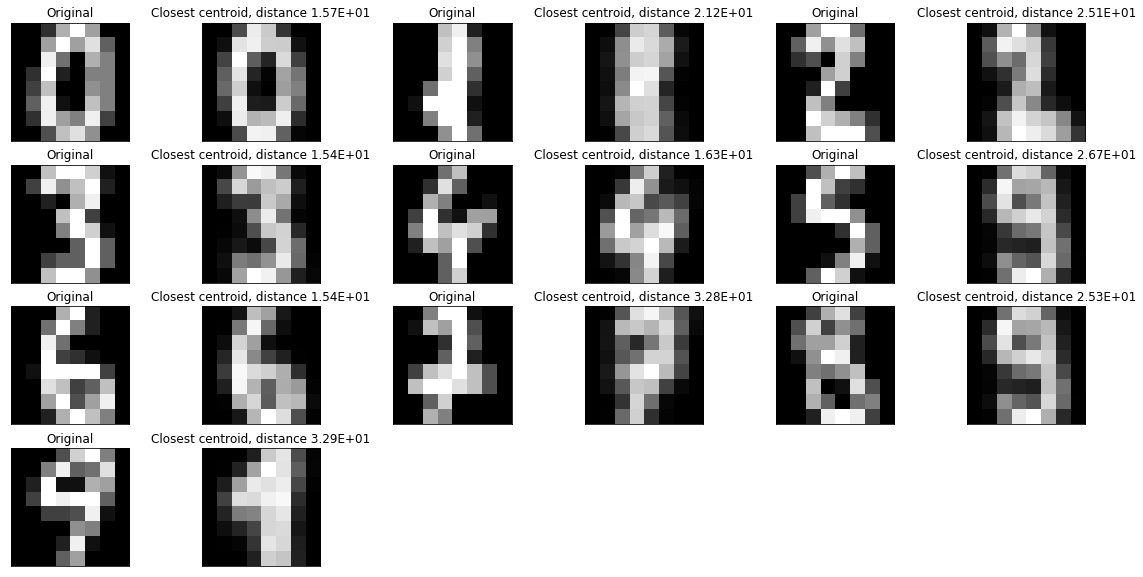

In [63]:
# now we plot the samples ans their closest centroids, together with the distance ( = reconstruction error)

plt.figure(figsize=(20,10))
for i,(im,im_cen,distance) in enumerate(zip(X_samp, closest_centroids, smallest_distances)):
        
    plt.subplot(4, 6, 1+2*i)
    plt.imshow(im.reshape(8, 8), cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    plt.title("Original")
    
    plt.subplot(4, 6, 2+2*i)
    plt.imshow(im_cen.reshape(8, 8), cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    plt.title("Closest centroid, distance %.2E"%distance)


Visualize the elbow method with inertia, by generating KMeans with clusters ranging from 1 to 99, using random state = 0. Inertia is stored in [inertia_](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

100%|██████████████████████████████████████████████████████████████████████████████████| 99/99 [01:35<00:00,  1.04it/s]


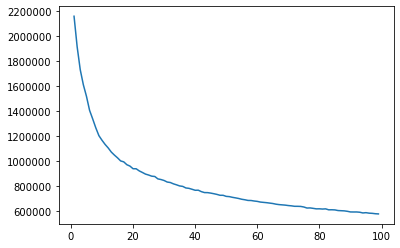

In [64]:
import tqdm

inertias = []
nclust = range(1,100)
### CELL TO COMPLETE, generate a KMeans model with varying n_clusters, fit it to the data 
### and add its inertia to the inertia list
inertias=[]
for i in tqdm.tqdm(nclust):

    #INSERT CODE HERE
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(x_digits)
    inertias.append(kmeans.inertia_)
    
plt.plot(nclust,inertias)


Sparse Dictionary Learning  on Digits
--

We are now going to pass to dictionary learning. The first thing is to generate a model using [MiniBatchDictionaryLearning](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.MiniBatchDictionaryLearning.html). MiniBatch here means that the method is trained using only a part of the dataset at each time, which helps immensely with the scaling of the method to bigger and wider datasets, but does not guarantee a performance as good as the normal method (where the method see all the dataset at the same time).

Use n_components=$16$, random_state=$0$ and verbose = $10$ to instantiate your object. 

The method [fit_transform](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.MiniBatchDictionaryLearning.html#sklearn.decomposition.MiniBatchDictionaryLearning.fit_transform) is more useful than fit in this case, as it returns the transformed version generated by the dictionary (denoted U in the course).

In [82]:
## CELL TO COMPLETE
dictlearn = MiniBatchDictionaryLearning(n_components=15, random_state=0, verbose=10)
dictlearn.fit_transform(x_digits)

Iteration   0 (elapsed time:   0s,  0.0mn)
Iteration  10 (elapsed time:   0s,  0.0mn)
Iteration  20 (elapsed time:   0s,  0.0mn)
Iteration  30 (elapsed time:   0s,  0.0mn)
Iteration  40 (elapsed time:   0s,  0.0mn)
Iteration  50 (elapsed time:   0s,  0.0mn)
Iteration  60 (elapsed time:   0s,  0.0mn)
Iteration  70 (elapsed time:   0s,  0.0mn)
Iteration  80 (elapsed time:   0s,  0.0mn)
Iteration  90 (elapsed time:   0s,  0.0mn)
Iteration  100 (elapsed time:   1s,  0.0mn)
Iteration  110 (elapsed time:   1s,  0.0mn)
Iteration  120 (elapsed time:   1s,  0.0mn)
Iteration  130 (elapsed time:   1s,  0.0mn)
Iteration  140 (elapsed time:   1s,  0.0mn)
Iteration  150 (elapsed time:   1s,  0.0mn)
Iteration  160 (elapsed time:   1s,  0.0mn)
Iteration  170 (elapsed time:   1s,  0.0mn)
Iteration  180 (elapsed time:   1s,  0.0mn)
Iteration  190 (elapsed time:   2s,  0.0mn)
Iteration  200 (elapsed time:   2s,  0.0mn)
Iteration  210 (elapsed time:   2s,  0.0mn)
Iteration  220 (elapsed time:   2s,  0.0mn

MiniBatchDictionaryLearning(alpha=1, batch_size=3, dict_init=None,
                            fit_algorithm='lars', n_components=15, n_iter=1000,
                            n_jobs=None, positive_code=False,
                            positive_dict=False, random_state=0, shuffle=True,
                            split_sign=False, transform_algorithm='omp',
                            transform_alpha=None,
                            transform_n_nonzero_coefs=None, verbose=10)

We now retrieve each of the components of the dictionary, and plot them so we can visualize the results

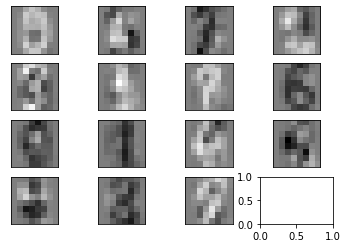

In [83]:
components = dictlearn.components_
fig, axis = plt.subplots(4, 4)
for i, d in enumerate(components):
    ax = axis[i//4][i%4]
    ax.imshow(d.reshape((8, 8)), cmap=plt.cm.gray, vmin=np.min(components), vmax=np.max(components))
    ax.set_xticks([])
    ax.set_yticks([])

Here we can see that the structure of the digits was kept by the components, which means that the digits are always centered and that the rest is a uniform background. 

Now we want to generate some reconstructions, so first we are going to generate some samples.

In [84]:
whichex = np.random.randint(low=0, high=100, size=1) 
samples = list()
indexes = list()
for i in range(10):
    index = np.where(y_digits==i)[0][whichex]
    samples.append(x_digits[index])
    indexes.append(index)
X_samp = np.concatenate(samples)
indexes = np.array(indexes)

And now we will use the codes obtained using the dictionary and the indexes used to extract the samples to reconstruct the data by using [np.dot]() function to perform matrix multiplication between the sample code and the components from the dictionary.

In [ ]:
### CELL TO COMPLETE, generate the reconstructions array using code, indexes and D



print(components.shape)
print(code.shape)
print(x_digits.shape)


In [ ]:
plt.figure(figsize=(20,5))
for plot_index,(digit,reconstruction) in enumerate(zip(X_samp,reconstructions)):
    plt.subplot(2,10,plot_index*2+1)

    plt.imshow(digit.reshape((8,8)),cmap=plt.cm.gray,vmin=x_digits.min(),vmax=x_digits.max())
    plt.xticks([])
    plt.yticks([])
    plt.title('$x$')
        
    plt.subplot(2,10,plot_index*2+2)
    plt.imshow(reconstruction.reshape((8,8)),cmap=plt.cm.gray,vmin=reconstructions.min(),vmax=reconstructions.max())
    plt.xticks([])
    plt.yticks([])
    error = np.sum((reconstruction-digit)**2)
    plt.title('${\~x}$, error %.2E' % error)

# Visualization of manifold learning

To give an example of the importance of manifold learning, we train a TSNE model and plot the 2D visualization.

In [ ]:
from sklearn.manifold import TSNE

unsup = TSNE(random_state=0)
examples = unsup.fit_transform(x_digits)
plt.scatter(examples[:,0], examples[:,1], c=y_digits)
plt.colorbar()

# Apply Unsupervised Learning to PyRat

The file features_unsupervised.csv contains a list of features extracted from PyRat games. 

In [ ]:
# Load data
import pandas

features_unsupervised = pandas.read_csv("features_unsupervised.csv", sep=";")


In [ ]:
features_unsupervised


The features are defined as follows : 
- Distance $d(i,j)$ is the shortest path (minimum number of moves) between two positions $i$ and $j$. In particular, we provide the distance between the rat and the python (distance(rat,python)).
- We also provide all distances between the starting position of each player and each cheese.
- The number assigned to the cheese for each player are sorted by ascending distances. (distance(rat,cheese_0) is the distance  to the cheese closest to the rat, distance(rat,cheese_1) is the next closest, etc.. same for python )
- Density of a cheese $c$ is defined as $density(c) = \sum_{c' \neq c}{\frac{1}{d(c,c')}}$
- Density around the starting position of a player $p$ is defined as $density(p) = \sum_{c}{\frac{1}{d(p,c)}}$



You can access the values as a numpy array using `features_unsupervised.values`, as well as all column names using `features_unsupervised.columns`

In [ ]:
features_unsupervised.values

In [ ]:
features_unsupervised.shape

In [ ]:
features_unsupervised.columns.to_list()

A first thing we ask you to do is to fit a Kmeans clustering on this data. As we don't provide labels, you'll have to rely on clustering metrics to evaluate the quality of clustering. You can use `inertia_` as we did above, as well as other unsupervised clustering metrics such as the [silhouette coefficent](https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient) or the [Calinski Harabasz index](https://scikit-learn.org/stable/modules/clustering.html#calinski-harabasz-index)

In [ ]:
#### TO BE COMPLETED



# PROJECT 2 - mini challenge 

Here are instructions for the next project (to be presented next week - **7 minutes + 3 minutes questions**)

Main Goal : **Assign cluster labels to each provided sample**

During your presentation we will test how well your cluster labels fit with the ground truth labels corresponding to the winner using supervised clustering metric such as the [adjusted rand index](https://scikit-learn.org/stable/modules/clustering.html#rand-index). **Importantly**, you can estimate more than 2 clusters - see the definition of clustering metrics that use ground truth labels, testing for consistency of cluster assignments with ground truth labels. 

You are free to use combination of unsupervised learning techniques, such as : 
- Unsupervised feature selection as done above 
- Manual feature selection and feature engineering (i.e. combining features with a calculation that you define yourself)
- [Feature preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html)
- [Decomposition techniques](https://scikit-learn.org/stable/modules/decomposition.html#decompositions) (may be used as a first step before clustering)
- [Any clustering algorithm](https://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods) implemented in sklearn.
- [Manifold learning](https://scikit-learn.org/stable/modules/manifold.html#manifold)

You can combine any of the techniques mentionned above, feel free to experiment. You can compare your different experiments using the unsupervised metrics we used previouly. 

In order to evaluate your solution, we ask you to provide us with the estimated cluster labels (numpy array named `labels` of shape `(1000,)`) by saving them with the following command : 

`np.savez_compressed('labels_binomeX.npz',labels=labels)`

And post the file in your binome channel just before the presentations start. 



# To go further: semi-supervised Learning on PyRat 

In some situations, data labeling can be pretty expensive, although it is available in large quantity. This can occur when human expertise is required, or when particular resources are needed to determine the label, among other examples. In these cases, one can be interested in what is commonly called *semi-supervised learning*. This paradigm is halfway between supervised and unsupervised learning, and typically consists in attributing labels to unlabeled samples, given a low count of labeled samples of the same classes. Semi-supervised learning can be used to provide a pseudo-label to the unlabeled samples, but also to get better performance than unsupervised learning. Indeed, knowledge of a few labels gives some information that can be exploited.

A way to perform semi-supervised clustering is to use a *nearest class mean* (NCM) classifier. Such a classifier computes a barycenter of the labeled samples of a particular class. Then, unsupervised samples are attributed the label of the closest barycenter. Those barycenters can be computed either directly as a mean of the values of all labeled samples per feature, or on a transformed representation of the samples. Such a transformation can be obtained for instance in the middle layer of an autoencoder.

Consider the following information:
- Rows 20, 140, 257, 394 and 451 in 'features_unsupervised.csv' are of class 0
- Rows 29, 258, 369, 500 and 580 in 'features_unsupervised.csv' are of class 1

Now program a NCM to give labels to all unlabeled samples.

In [1]:
def nearest_class_mean(train_features, classes, test_features):

    """Nearest class mean classifier
    
    Args:
        train_features (numpy.ndarray): A matrix of training features (n_samples, n_features)
        classes (numpy.array): An array of class labels for each training sample (n_samples,)
        test_features (numpy.ndarray): A matrix of test features (n_samples, n_features)
        
    Returns:
        numpy.ndarray: A list of predicted class labels for each test sample (n_samples,)
    """
    
    #### TO BE COMPLETED

In [ ]:
# Prepare information
labels_1 = [20, 140, 257, 394, 451]
labels_2 = [29, 258, 369, 500, 580]
features_unsupervised = features_unsupervised.astype(float)
train_samples = features_unsupervised.values[labels_1 + labels_2, :]
test_samples = features_unsupervised.values[[i for i in range(features_unsupervised.shape[0]) if i not in labels_1 + labels_2], :]
classes = np.array([0] * len(labels_1) + [1] * len(labels_2))

# Call the nearest class mean classifier
result = nearest_class_mean(train_samples, classes, test_samples)
print(result)